# Intracacies of Study Environments at IIT Hyderabad
## Project No: 3
### Group Members:
1. Prakhar Patni - MA20BTECH11014 
2. K N Vardhan - MA20BTECH11006
3. Varunaditya Singhal - MA20BTECH11021
4. Tanmay Goyal - AI20BTECH11021
5. Tanay Yadav  - AI20BTECH11026
6. Sujal  - AI20BTECH11020

## Importing libraries and getting the data as a Pandas Dataframe from a .csv file

In [1]:
# importing the required libraries

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the collected data

df = pd.read_csv('responses_project.csv')

## Processing the data

In [3]:
df.head()

,Timestamp,Where do you like to study?,Gender,Do you prefer to study alone ?,How many Hours do you study in one go ?,Do you prefer snacks while studying ?,In which Block you stay?,Do you prefer to study on Bed or Study table?,Which program are you enrolled in ?,Which department are you in ?,Do you prefer Live Lectures or Recording?,Do you prefer to study with Lec recording or Lec slides?,Score
0,4/5/2022 17:26:17,Your Room,Male,Alone,2-3 Hrs,Yes,Ramanuja,Bed,Undergraduate,Mathematics,Recording,Slides,NaN
1,4/5/2022 20:18:50,Your Room,Male,Alone,1-2 Hrs,No,Ramanuja,Study Table,Undergraduate,Mathematics,Recording,Slides,NaN
2,4/5/2022 21:07:57,Your Room,Male,Alone,1-2 Hrs,Yes,Ramanuja,Study Table,Undergraduate,Mathematics,Live Lectures,Slides,NaN
3,4/5/2022 21:18:02,Your Room,Female,Alone,2-3 Hrs,Yes,Gargi,Both,Undergraduate,Physics,Live Lectures,Slides,NaN
4,4/5/2022 21:18:13,Academic Block,Female,Alone,3-4 Hrs,Sometimes,Bhaskara,Study Table,Undergraduate,Mathematics,Both are equally preferable,Slides,NaN


In [4]:
# removing unneccesary extra whitespace in column names
df.columns = [x.lower().rstrip() for x in df.columns]

# dropping the columns not required for the further analysis

df = df.drop(columns=['timestamp', 'score'])

In [5]:
# since hostel blocks are an important statistic, we drop the entries with no entry for the hostel block

df.dropna(subset=['in which block you stay?'], inplace=True)


In [6]:
# replacing the NaN values with the modal value for the Question

df['do you prefer snacks while studying ?'].fillna(
    str(df['do you prefer snacks while studying ?'].mode()[0]), inplace=True)
df['do you prefer to study on bed or study table?'].fillna(
    str(df['do you prefer to study on bed or study table?'].mode()[0]), inplace=True)
df['do you prefer live lectures or recording?'].fillna(
    str(df['do you prefer live lectures or recording?'].mode()[0]), inplace=True)

In [7]:
# replacing the block names with block codes 
# A - Aryabhatta, B - Bhaskara, C - Charaka, D - Susruta, E - Kautilya, F - Vyasa
# G - Brahmagupta, H - Varahamira, I - Gargi, J - Maitreyi, P - Kapila, R - Ramanuja

to_replace_blocks = ['Aryabhatta', 'Bhaskara', 'Brahmagupta', 'Charaka', 'Gargi', 'Kapila',
                     'Kautilya', 'Maitreyi', 'Ramanuja', 'Susruta', 'Varahamira', 'Vyasa']

value_blocks = ['A', 'B', 'G', 'C', 'I', 'P', 'E', 'J', 'R', 'D', 'H', 'F']
df['in which block you stay?'].replace(to_replace_blocks, value_blocks, inplace=True)

In [8]:
# similarly, replacing the department names with the departmental codes at IITH

to_replace_depts = ['Artificial Intelligence', 'Bio Engineering', 'Chemical Engineering', 'Chemistry', 
                    'Civil Engineering', 'Computer Science', 'Design Department', 'Electrical Engineering', 
                    'Liberal Arts Department', 'Material Engineering', 'Mathematics', 'Mechanical Engineering', 
                    'Others', 'Physics']

value_depts = ['AI', 'BM', 'CH', 'CY', 'CE', 'CS', 'DES', 'EE', 'LA', 'MS', 'MA', 'ME', 'Others', 'PH']
df['which department are you in ?'].replace(to_replace_depts, value_depts, inplace=True)

In [9]:
# similarly, replacing the study hours to float value format

to_replace_hrs = ['1-2 Hrs', '2-3 Hrs', '3-4 Hrs', '4-5 Hrs', '5-6 Hrs', '6-7 Hrs', '7-8 Hrs']
value_hrs = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
df['how many hours do you study in one go ?'].replace(to_replace_hrs, value_hrs, inplace=True)

## Analyzing the Uni-variate Numerical dataset

In [10]:
# getting an overall summary of our data 

df.describe()

,how many hours do you study in one go ?
count,118.000000
mean,2.466102
std,1.246754
min,1.500000
25%,1.500000
50%,2.500000
75%,2.500000
max,7.500000


In [11]:
# finding the mean, median, and mode

print(f'Mean -> {df["how many hours do you study in one go ?"].mean()} hrs')
print(f'Median -> {df["how many hours do you study in one go ?"].median()} hrs')
print(f'Mode -> {df["how many hours do you study in one go ?"].median()} hrs')

Mean -> 2.4661016949152543 hrs
Median -> 2.5 hrs
Mode -> 2.5 hrs


In [12]:
# finding the confidence intervals for the numerical dataset

new_df = df['how many hours do you study in one go ?'].to_numpy()

# 95% confidence interval
Interval_95 = st.t.interval(alpha=0.95, df=len(new_df), loc=np.mean(new_df), scale=st.sem(new_df))
print(f'95% Confidence Interval -> {Interval_95}')

# 99% confidence interval
Interval_99 = st.t.interval(alpha=0.99, df=len(new_df), loc=np.mean(new_df), scale=st.sem(new_df))
print(f'99% Confidence Interval -> {Interval_99}')


95% Confidence Interval -> (2.238819810180139, 2.69338357965037)
99% Confidence Interval -> (2.1656101375328065, 2.766593252297702)


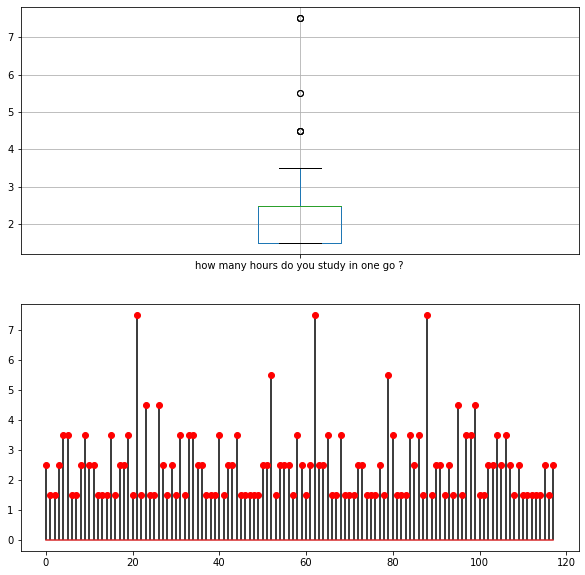

In [13]:
# plot of uni-variate numerical dataset

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
df.boxplot(column=['how many hours do you study in one go ?'], grid=True)
plt.subplot(2, 1, 2)
plt.stem(df['how many hours do you study in one go ?'], markerfmt='ro', linefmt='k-')
plt.show()

## Visualizing the collected data

In [14]:
# preparing the titles for each of the bar graphs plotted
titles = list(df.columns)

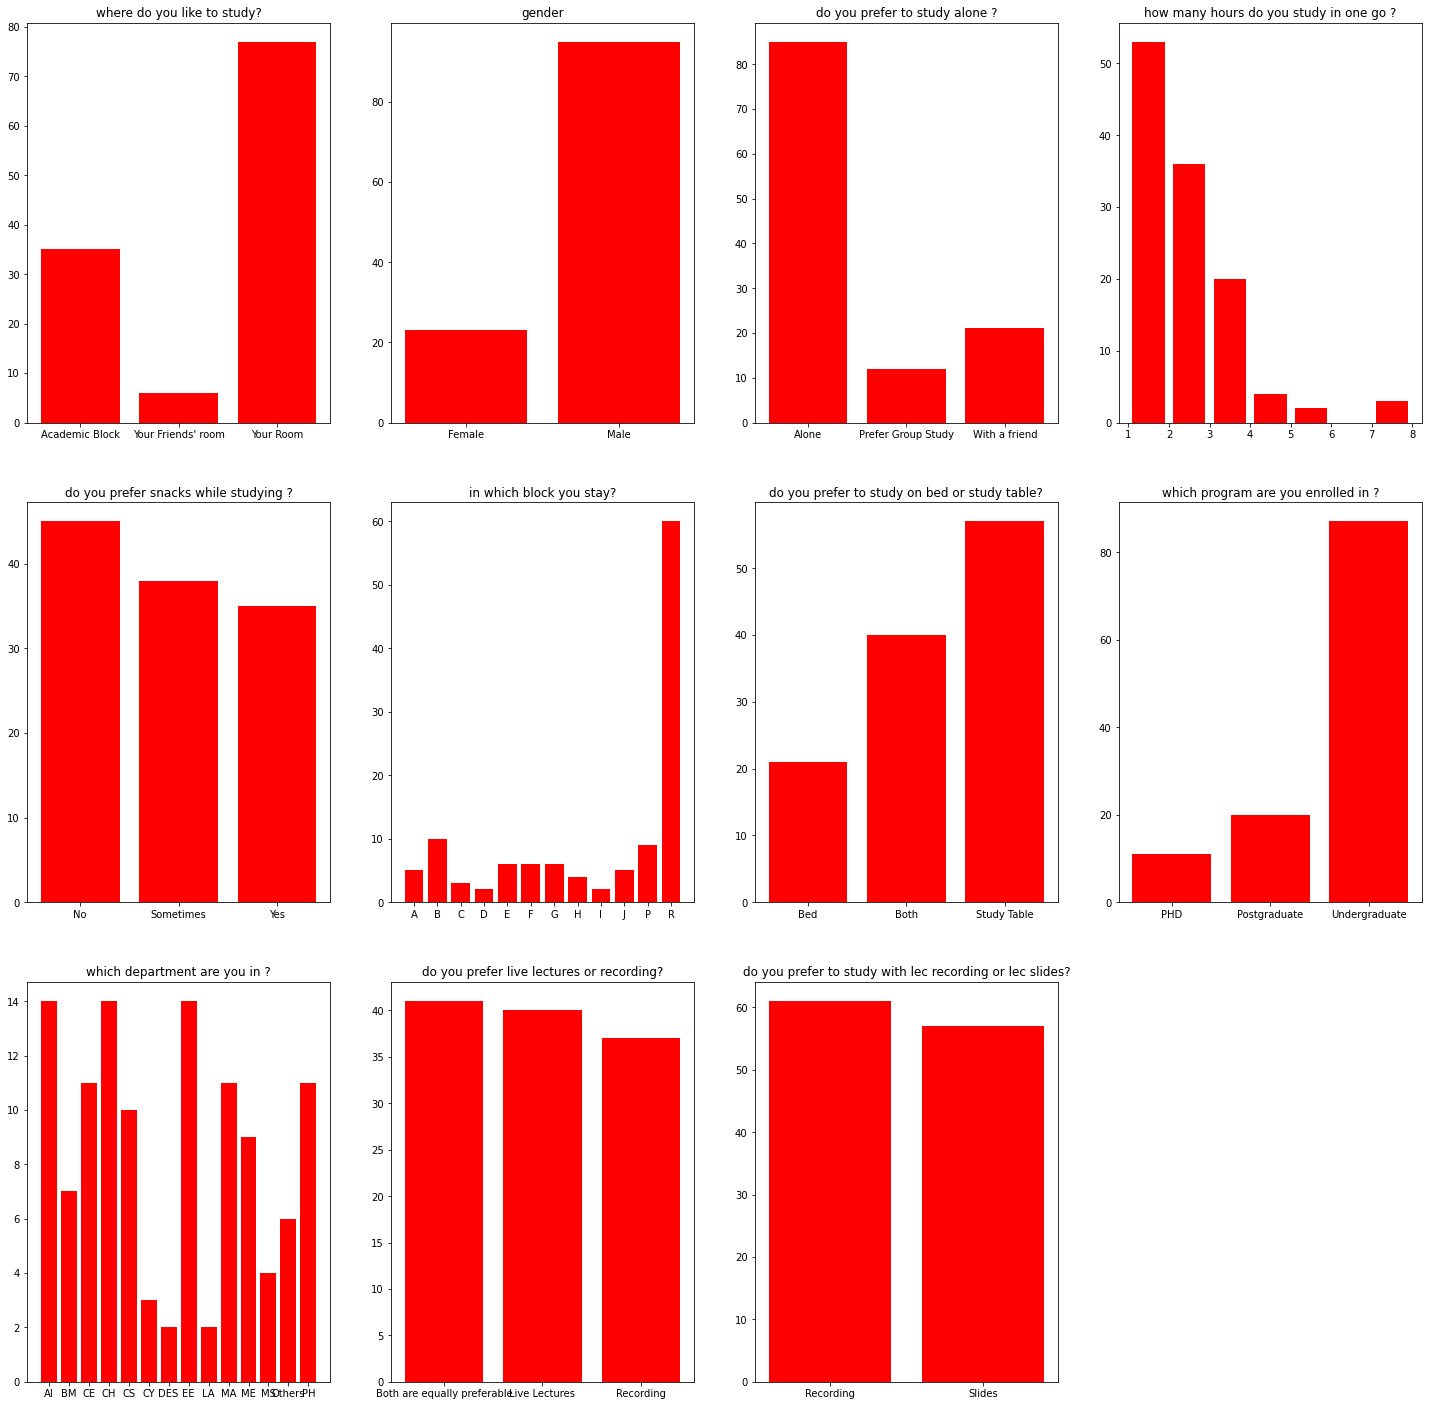

In [15]:
# converting the pandas dataframe to a numpy array to get the counts to visualise the obtained data

data_numpy = df.to_numpy()

# plotting the acquired data
plt.figure(figsize=(25, 25))
for i in range(data_numpy.shape[1]):
    plt.subplot(3, 4, i+1)
    plt.title(titles[i])
    plotable_data = np.unique(data_numpy[:, i], return_counts=True)
    plt.bar(plotable_data[0], plotable_data[1], color='r')
plt.show()

## Plotting 2 Categorical variables in a segmented bar plot. 

**Where you like to study?** vs **In which block you stay?**

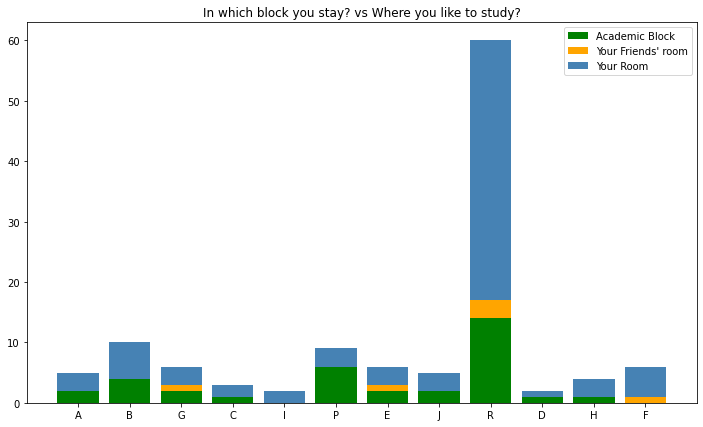

In [16]:
# getting the values for the preferred place to study
counts_s_b = np.zeros((12, 3))
for i in range(data_numpy.shape[0]):
    idx = 0
    for j in value_blocks:
        if j == data_numpy[i, 5]:
            if data_numpy[i, 0] == 'Academic Block':
                counts_s_b[idx, 0] += 1
            if data_numpy[i, 0] == "Your Friends' room":
                counts_s_b[idx, 1] += 1
            if data_numpy[i, 0] == 'Your Room':
                counts_s_b[idx, 2] += 1
        idx += 1

# plotting the graph

plt.figure(figsize=(12,7))
plt.title('In which block you stay? vs Where you like to study?')
plt.bar(value_blocks, counts_s_b[:, 0], color='green', label='Academic Block')
plt.bar(value_blocks, counts_s_b[:, 1], bottom=counts_s_b[:, 0], color='orange', label="Your Friends' room")
plt.bar(value_blocks, counts_s_b[:, 2], bottom=counts_s_b[:, 1]+counts_s_b[:, 0], color='steelblue', label='Your Room')
plt.legend()
plt.show()

**Do you prefer to study alone?** vs **Program you are enrolled in**

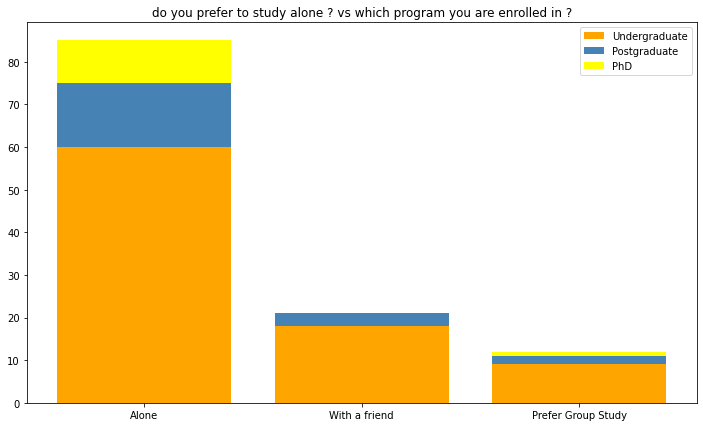

In [17]:
value_study = ['Alone', 'With a friend', 'Prefer Group Study']
counts_s_b = np.zeros((3, 3))
for i in range(data_numpy.shape[0]):
    idx = 0
    for j in value_study:
        if j == data_numpy[i, 2]:
            if data_numpy[i, 7] == 'Undergraduate':
                counts_s_b[idx, 0] += 1
            if data_numpy[i, 7] == "Postgraduate":
                counts_s_b[idx, 1] += 1
            if data_numpy[i, 7] == 'PHD':
                counts_s_b[idx, 2] += 1
        idx += 1

# plotting the graph
plt.figure(figsize=(12, 7))
plt.title('do you prefer to study alone ? vs which program you are enrolled in ?')
plt.bar(value_study, counts_s_b[:, 0], color='orange', label='Undergraduate')
plt.bar(value_study, counts_s_b[:, 1], bottom=counts_s_b[:, 0], color='steelblue', label="Postgraduate")
plt.bar(value_study, counts_s_b[:, 2], bottom=counts_s_b[:, 1]+counts_s_b[:, 0], color='yellow', label='PhD')
plt.legend()
plt.show()

**Lecture recordings/slides** vs **number of hours you study at one go?**

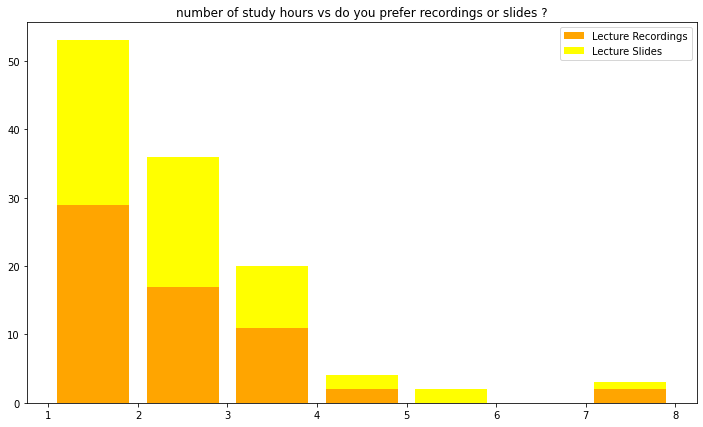

In [18]:
counts_s_b = np.zeros((7, 2))
for i in range(data_numpy.shape[0]):
    idx = 0
    for j in value_hrs:
        if j == data_numpy[i, 3]:
            if data_numpy[i, 10] == 'Recording':
                counts_s_b[idx, 0] += 1
            if data_numpy[i, 10] == "Slides":
                counts_s_b[idx, 1] += 1
        idx += 1

# plotting the graph
plt.figure(figsize=(12, 7))
plt.title('number of study hours vs do you prefer recordings or slides ?')
plt.bar(value_hrs, counts_s_b[:, 0], color='orange', label='Lecture Recordings')
plt.bar(value_hrs, counts_s_b[:, 1], bottom=counts_s_b[:, 0], color='yellow', label="Lecture Slides")
plt.legend()
plt.show()


**Number of study hours** vs **Consumption of snacks**

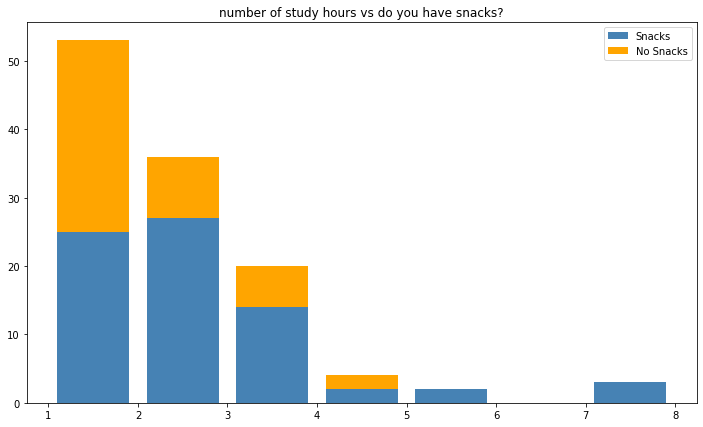

In [19]:
# segmented bar plot for number of study hours vs consumption of snacks

counts_s_b = np.zeros((7, 2))
for i in range(data_numpy.shape[0]):
    idx = 0
    for j in value_hrs:
        if j == data_numpy[i, 3]:
            if data_numpy[i, 4] == 'Yes' or data_numpy[i, 4] == 'Sometimes':
                counts_s_b[idx, 0] += 1
            if data_numpy[i, 4] == "No":
                counts_s_b[idx, 1] += 1
        idx += 1

# plotting the graph
plt.figure(figsize=(12, 7))
plt.title('number of study hours vs do you have snacks?')
plt.bar(value_hrs, counts_s_b[:, 0], color='steelblue', label='Snacks')
plt.bar(value_hrs, counts_s_b[:, 1], bottom=counts_s_b[:, 0], color='orange', label="No Snacks")
plt.legend()
plt.show()

# **Hypothesis Testing:**
### Case-1

In [20]:
programs = df[['which program are you enrolled in ?', 'how many hours do you study in one go ?']]

ug = programs[programs['which program are you enrolled in ?'] == 'Undergraduate']
ug.rename(columns = {'how many hours do you study in one go ?': 'how many hours do a undergraduate study in one go ?'}, inplace = True)
non_ug = programs[programs['which program are you enrolled in ?'] != 'Undergraduate']
non_ug.rename(columns = {'how many hours do you study in one go ?': 'how many hours do a postgraduate/PhD study in one go ?'}, inplace = True)



In [21]:
ug.describe()

,how many hours do a undergraduate study in one go ?
count,87.000000
mean,2.500000
std,1.219989
min,1.500000
25%,1.500000
50%,2.500000
75%,3.500000
max,7.500000


In [22]:
non_ug.describe()


,how many hours do a postgraduate/PhD study in one go ?
count,31.000000
mean,2.370968
std,1.335214
min,1.500000
25%,1.500000
50%,1.500000
75%,2.500000
max,7.500000


In [23]:
# Calculating sample Variance
s_ug = (ug.std() ** 2) * ug.count() / (ug.count() - 1)
s_non_ug = (non_ug.std() ** 2) * non_ug.count() / (non_ug.count() - 1)
print("Sample Variance of Undergraduate Students is {}".format(s_ug))
print("Sample Variance of Postgraduate Students is {}".format(s_non_ug))


Sample Variance of Undergraduate Students is how many hours do a undergraduate study in one go ?    1.505679
which program are you enrolled in ?                         NaN
dtype: float64
Sample Variance of Postgraduate Students is how many hours do a postgraduate/PhD study in one go ?    1.842222
which program are you enrolled in ?                            NaN
dtype: float64


In [24]:
print(st.t.ppf(0.05 , 116))

-1.658095744259458


### Case-2

In [25]:

programs = df[['do you prefer to study alone ?', 'how many hours do you study in one go ?']]

alone = programs[programs['do you prefer to study alone ?'] == 'Alone']
alone.rename(columns = {'how many hours do you study in one go ?': 'how many hours do a undergraduate study in one go ?'}, inplace = True)
not_alone = programs[programs['do you prefer to study alone ?'] != 'Alone']
not_alone.rename(columns = {'how many hours do you study in one go ?': 'how many hours do a postgraduate/PhD study in one go ?'}, inplace = True)


In [26]:
alone.describe()

,how many hours do a undergraduate study in one go ?
count,85.000000
mean,2.488235
std,1.239183
min,1.500000
25%,1.500000
50%,2.500000
75%,3.500000
max,7.500000


In [27]:
not_alone.describe()

,how many hours do a postgraduate/PhD study in one go ?
count,33.000000
mean,2.409091
std,1.283638
min,1.500000
25%,1.500000
50%,2.500000
75%,2.500000
max,7.500000


In [28]:
# Calculating sample variances
s_alone = (alone.std() ** 2) * alone.count() / alone.count() - 1
s_not_alone = (not_alone.std() ** 2) * not_alone.count() / not_alone.count() - 1

print("Sample Variance of students studying alone is {}".format(s_alone))
print("Sample Variance of students not studying alone is {}".format(s_not_alone))

Sample Variance of students studying alone is do you prefer to study alone ?                              NaN
how many hours do a undergraduate study in one go ?    0.535574
dtype: float64
Sample Variance of students not studying alone is do you prefer to study alone ?                                 NaN
how many hours do a postgraduate/PhD study in one go ?    0.647727
dtype: float64


In [29]:
print(st.t.ppf(0.05 , 116))

-1.658095744259458


### Case 3

In [30]:
programs = df[['do you prefer snacks while studying ?', 'how many hours do you study in one go ?']]

snacks = programs[programs['do you prefer snacks while studying ?'] == 'Yes']
snacks.rename(columns = {'how many hours do you study in one go ?': 'how many hours do a undergraduate study in one go ?'}, inplace = True)
no_snacks = programs[programs['do you prefer snacks while studying ?'] != 'Yes']
no_snacks.rename(columns = {'how many hours do you study in one go ?': 'how many hours do a postgraduate/PhD study in one go ?'}, inplace = True)


In [31]:
snacks.describe()

,how many hours do a undergraduate study in one go ?
count,35.000000
mean,2.671429
std,1.382362
min,1.500000
25%,1.500000
50%,2.500000
75%,3.500000
max,7.500000


In [32]:
no_snacks.describe()

,how many hours do a postgraduate/PhD study in one go ?
count,83.000000
mean,2.379518
std,1.183191
min,1.500000
25%,1.500000
50%,2.500000
75%,2.500000
max,7.500000


In [33]:
# Calculating sample variances
s_snacks = (snacks.std() ** 2) * snacks.count() / snacks.count() - 1
s_no_snacks = (no_snacks.std() ** 2) * no_snacks.count() / no_snacks.count() - 1

print("Sample Variance of students who prefer having snacks is {}".format(s_snacks))
print("Sample Variance of students who donot prefer having snacks is {}".format(s_no_snacks))

Sample Variance of students who prefer having snacks is do you prefer snacks while studying ?                       NaN
how many hours do a undergraduate study in one go ?    0.910924
dtype: float64
Sample Variance of students who donot prefer having snacks is do you prefer snacks while studying ?                          NaN
how many hours do a postgraduate/PhD study in one go ?    0.399941
dtype: float64


In [34]:
print(st.t.ppf(0.05 , 116))

-1.658095744259458


### Case 4

In [35]:

programs = df[['do you prefer to study with lec recording or lec slides?', 'how many hours do you study in one go ?']]

slides = programs[programs['do you prefer to study with lec recording or lec slides?'] == 'Slides']
slides.rename(columns = {'how many hours do you study in one go ?': 'how many hours do a undergraduate study in one go ?'}, inplace = True)
recording = programs[programs['do you prefer to study with lec recording or lec slides?'] != 'Slides']
recording.rename(columns = {'how many hours do you study in one go ?': 'how many hours do a postgraduate/PhD study in one go ?'}, inplace = True)


In [36]:
slides.describe()

,how many hours do a undergraduate study in one go ?
count,57.000000
mean,2.500000
std,1.224745
min,1.500000
25%,1.500000
50%,2.500000
75%,2.500000
max,7.500000


In [37]:
recording.describe()

,how many hours do a postgraduate/PhD study in one go ?
count,61.000000
mean,2.434426
std,1.276308
min,1.500000
25%,1.500000
50%,2.500000
75%,2.500000
max,7.500000


In [38]:
# calculating Sample Variance
s_slides = (slides.std() ** 2) * slides.count() / slides.count() - 1
s_recording = (recording.std() ** 2) * recording.count() / recording.count() - 1
print("The sample variance of those studying from slides is {}".format(s_slides))
print("The sample variance of those studying from lecture recordings is {}".format(s_recording))

The sample variance of those studying from slides is do you prefer to study with lec recording or lec slides?    NaN
how many hours do a undergraduate study in one go ?         0.5
dtype: float64
The sample variance of those studying from lecture recordings is do you prefer to study with lec recording or lec slides?         NaN
how many hours do a postgraduate/PhD study in one go ?      0.628962
dtype: float64


In [39]:
print(st.t.ppf(0.05 , 116))

-1.658095744259458
